In [129]:
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

### Loading the data and target 

In [130]:
data = np.load('data.npy')
target = np.load('target.npy')

print(data.shape)
print(target.shape)

(8244, 100, 100, 1)
(8244,)


### Splitting that data and target 

In [131]:
x_train,x_test,y_train,y_test = train_test_split(data,target,train_size=0.7)

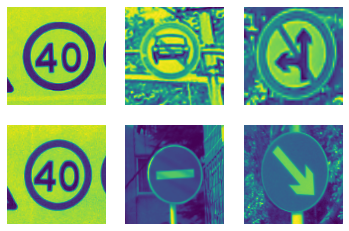

In [132]:
count=1

for i in range(101,107):
    plt.subplot(2,3,count)
    count+=1
    plt.imshow(x_train[i])
    plt.axis('off')

### Model building 

In [133]:
cnn = models.cnn = models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(100,100,1)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(58,activation='softmax')
    
])

In [134]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 16928)             0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [135]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Fitting the data 

In [136]:
s = cnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
181/181 [==============================] - 117s 637ms/step - loss: 1.9211 - accuracy: 0.5562 - val_loss: 0.8936 - val_accuracy: 0.7842
Epoch 2/10
181/181 [==============================] - 149s 824ms/step - loss: 0.3807 - accuracy: 0.9071 - val_loss: 0.4844 - val_accuracy: 0.8783
Epoch 3/10
181/181 [==============================] - 168s 930ms/step - loss: 0.1239 - accuracy: 0.9662 - val_loss: 0.2866 - val_accuracy: 0.9483
Epoch 4/10
181/181 [==============================] - 165s 910ms/step - loss: 0.0554 - accuracy: 0.9882 - val_loss: 0.3828 - val_accuracy: 0.9163
Epoch 5/10
181/181 [==============================] - 167s 924ms/step - loss: 0.0431 - accuracy: 0.9896 - val_loss: 0.2520 - val_accuracy: 0.9608
Epoch 6/10
181/181 [==============================] - 168s 928ms/step - loss: 0.0164 - accuracy: 0.9969 - val_loss: 0.2972 - val_accuracy: 0.9547
Epoch 7/10
181/181 [==============================] - 166s 917ms/step - loss: 0.0574 - accuracy: 0.9863 - val_loss: 0.2968 -

In [137]:
s.history['accuracy']

[0.5561525225639343,
 0.9071057438850403,
 0.9662045240402222,
 0.988214910030365,
 0.9896013736724854,
 0.9968804121017456,
 0.9863085150718689,
 0.9856152534484863,
 0.9890814423561096,
 0.9970537424087524]

In [138]:
s.history['val_accuracy']

[0.7841551899909973,
 0.8783347010612488,
 0.9482619166374207,
 0.9163298010826111,
 0.9607922434806824,
 0.9547291994094849,
 0.9555376172065735,
 0.9595796465873718,
 0.957154393196106,
 0.9700888991355896]

In [139]:
# loss plot per each epoch

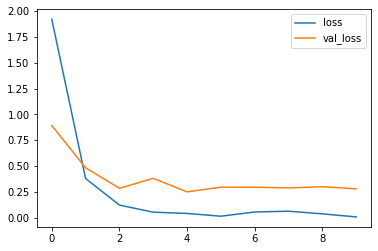

In [140]:
plt.plot(s.history['loss'],label='loss')                   # loss - training loss
plt.plot(s.history['val_loss'],label='val_loss')           # val_loss - testing loss
plt.legend()

In [141]:
# accuracy plot per each epoch

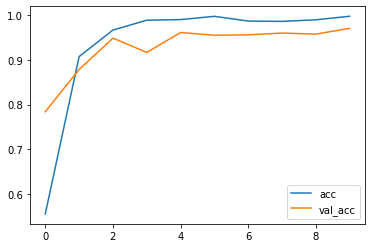

In [142]:
plt.plot(s.history['accuracy'],label='acc')                   # acc - training accuracy
plt.plot(s.history['val_accuracy'],label='val_acc')           # val_acc - testing accuracy
plt.legend()

In [143]:
cnn.evaluate(x_test,y_test)

78/78 [==============================] - 10s 126ms/step - loss: 0.2809 - accuracy: 0.9701


[0.2809126675128937, 0.9700888991355896]

### Prediction

In [144]:
y_pred=cnn.predict(x_test)

78/78 [==============================] - 10s 126ms/step


In [145]:
y_pred[50]

array([7.78674508e-15, 1.00459669e-16, 2.90277402e-09, 2.44489021e-12,
       1.15448103e-16, 5.20545860e-14, 1.57657942e-10, 1.02890614e-17,
       1.89272657e-20, 1.78181415e-27, 1.57561541e-20, 1.10824381e-12,
       1.12779567e-12, 4.42438216e-15, 1.37127315e-16, 1.82567116e-18,
       4.77579940e-16, 2.62600475e-14, 1.23763928e-13, 9.38754770e-17,
       3.20523838e-12, 1.25503362e-12, 1.01720195e-10, 1.45481604e-11,
       6.55706297e-14, 1.87755060e-15, 1.58364988e-10, 1.16499336e-11,
       9.06361311e-06, 1.15337926e-07, 9.23138796e-05, 2.96973224e-15,
       1.13605425e-15, 2.12316262e-14, 2.50735901e-13, 1.83570833e-16,
       9.12948103e-12, 3.21925986e-10, 5.05957301e-15, 1.38222383e-15,
       6.73643162e-13, 4.54851814e-13, 4.36818116e-13, 3.81603298e-16,
       2.99863229e-17, 4.86015263e-18, 1.51176716e-09, 1.31876769e-13,
       8.33511337e-15, 4.79284784e-15, 2.92359831e-10, 9.66685781e-18,
       4.47970301e-08, 8.85619052e-13, 4.81277134e-08, 9.99898434e-01,
      

In [146]:
y_pred = y_pred.argmax(axis=1)

In [147]:
y_pred[50]

55

### Label dictionary

In [148]:
categories = pd.read_csv('../DL Project 3/archive/labels.csv')

In [149]:
categories

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [150]:
label_dict={}

for i in range(len(categories)):
    label_dict[categories.loc[i][0]]=categories.loc[i][1]

label_dict

{0: 'Speed limit (5km/h)',
 1: 'Speed limit (15km/h)',
 2: 'Speed limit (30km/h)',
 3: 'Speed limit (40km/h)',
 4: 'Speed limit (50km/h)',
 5: 'Speed limit (60km/h)',
 6: 'Speed limit (70km/h)',
 7: 'speed limit (80km/h)',
 8: 'Dont Go straight or left',
 9: 'Dont Go straight or Right',
 10: 'Dont Go straight',
 11: 'Dont Go Left',
 12: 'Dont Go Left or Right',
 13: 'Dont Go Right',
 14: 'Dont overtake from Left',
 15: 'No Uturn',
 16: 'No Car',
 17: 'No horn',
 18: 'Speed limit (40km/h)',
 19: 'Speed limit (50km/h)',
 20: 'Go straight or right',
 21: 'Go straight',
 22: 'Go Left',
 23: 'Go Left or right',
 24: 'Go Right',
 25: 'keep Left',
 26: 'keep Right',
 27: 'Roundabout mandatory',
 28: 'watch out for cars',
 29: 'Horn',
 30: 'Bicycles crossing',
 31: 'Uturn',
 32: 'Road Divider',
 33: 'Traffic signals',
 34: 'Danger Ahead',
 35: 'Zebra Crossing',
 36: 'Bicycles crossing',
 37: 'Children crossing',
 38: 'Dangerous curve to the left',
 39: 'Dangerous curve to the right',
 40: 'Unk

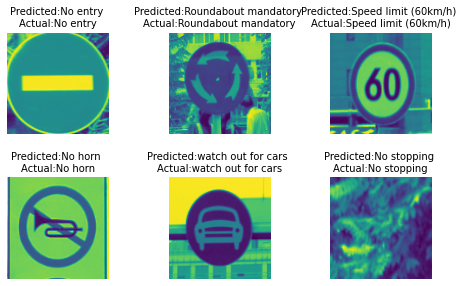

In [151]:
count=1

for i in range(50,56):
    plt.subplot(2,3,count)
    count+=1
    plt.title(f'''Predicted:{label_dict[y_pred[i]]} 
Actual:{label_dict[y_test[i]]}''', fontsize=10)
    plt.imshow(x_test[i])
    plt.axis('off')
plt.tight_layout(pad=0.4, w_pad=6, h_pad=1.0)

### Saving the model

In [152]:
model = cnn
model.save('road_sign_recognition')

INFO:tensorflow:Assets written to: road_sign_recognition\assets


INFO:tensorflow:Assets written to: road_sign_recognition\assets


### Loading the model (test)

In [153]:
load_model=models.load_model('road_sign_recognition')

In [154]:
pred_val = load_model.predict(x_train[101:107])

1/1 [==============================] - 0s 143ms/step


In [155]:
pred_val = pred_val.argmax(axis=1)

In [156]:
pred_val

array([ 3, 16,  8,  3, 55, 26], dtype=int64)

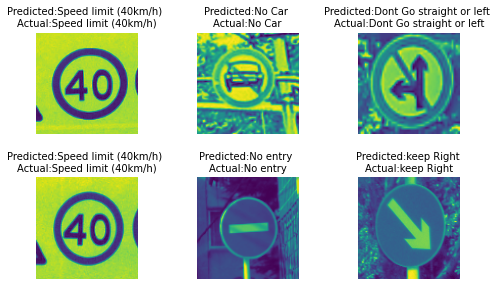

In [157]:
count=1

for i in range(6):
    plt.subplot(2,3,count)
    count+=1
    plt.title(f'''Predicted:{label_dict[pred_val[i]]} 
Actual:{label_dict[y_train[101:107][i]]}''', fontsize=10)
    plt.imshow(x_train[101:107][i])
    plt.axis('off')
plt.tight_layout(pad=0.4, w_pad=6, h_pad=1.0)

### Saving the label dictionary 

In [158]:
np.save('label_dict',label_dict)